In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
b, d, g, N, l = 0, 0, 0.4, 1, 0.8

colors = plt.cm.plasma(np.linspace(0, 1, 4))

def f(t,y):
    S, I, R = y
    return [b*N-l*S-d*S, l*S-g*I-d*I, g*I-d*R]

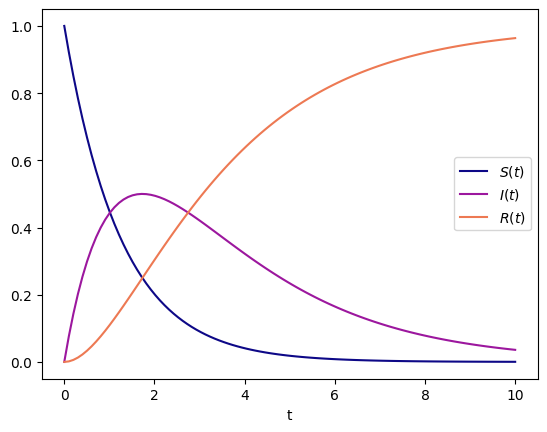

In [3]:
from scipy.integrate import solve_ivp
y0 = [1, 0, 0]
t_span = (0, 10)

solutionf = solve_ivp(f, t_span, y0, method='Radau', t_eval=np.linspace(0, 10, 100))

fig = plt.figure()
plt.plot(solutionf.t, solutionf.y[0], label=r'$S(t)$', color=colors[0])
plt.plot(solutionf.t, solutionf.y[1], label=r'$I(t)$', color=colors[1])
plt.plot(solutionf.t, solutionf.y[2], label=r'$R(t)$', color=colors[2])
plt.xlabel('t')
plt.legend()
# plt.title('Решение системы ОДУ методом Radau')
# plt.grid()
plt.show()
fig.savefig('sir.pdf')

In [4]:
b, d, g, N, l = 0, 0, 1, 1, 0.1

def gg(t,y):
    S, I = y
    return [g*I-l*S, l*S-g*I]

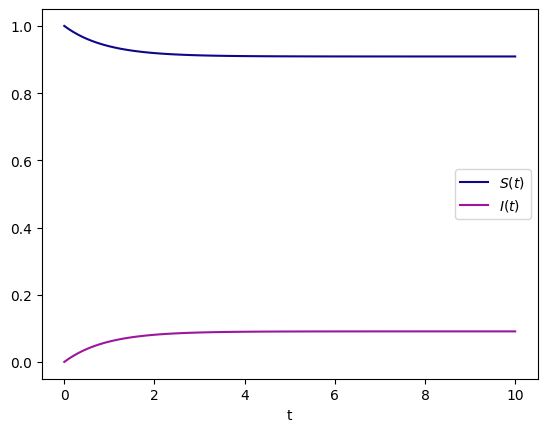

In [5]:
from scipy.integrate import solve_ivp
y0 = [1, 0]
t_span = (0, 10)

solutiong = solve_ivp(gg, t_span, y0, method='Radau', t_eval=np.linspace(0, 10, 100))

fig = plt.figure()
plt.plot(solutiong.t, solutiong.y[0], label=r'$S(t)$', color=colors[0])
plt.plot(solutiong.t, solutiong.y[1], label=r'$I(t)$', color=colors[1])
plt.xlabel('t')
plt.legend()
# plt.title('Решение системы ОДУ методом Radau')
# plt.grid()
plt.show()
fig.savefig('sis.pdf')

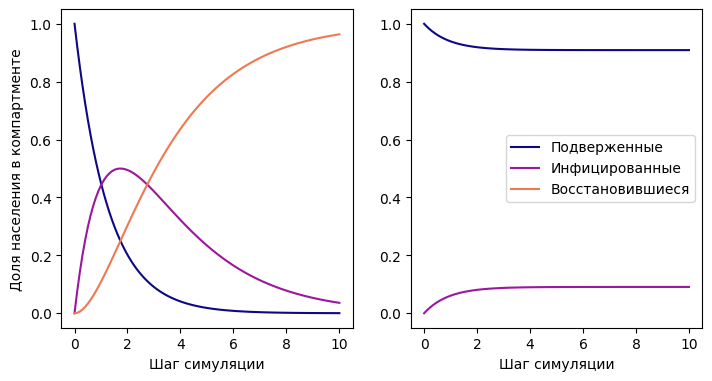

In [17]:
A4_WIDTH = 8.27  # Ширина A4
A4_HEIGHT = 8.27/2  # Высота A4 (можно уменьшить, если нужно)
fig, ax = plt.subplots(1, 2, figsize=(A4_WIDTH, A4_HEIGHT))

ax[0].plot(solutionf.t, solutionf.y[0], label=r'Подверженные', color=colors[0])
ax[0].plot(solutionf.t, solutionf.y[1], label=r'Инфицированные', color=colors[1])
ax[0].plot(solutionf.t, solutionf.y[2], label=r'Восстановившиеся', color=colors[2])

ax[1].plot(solutiong.t, solutiong.y[0], label=r'Подверженные', color=colors[0])
ax[1].plot(solutiong.t, solutiong.y[1], label=r'Инфицированные', color=colors[1])
ax[1].plot([], [], label=r'Восстановившиеся', color=colors[2])

# ax[0].legend()
ax[1].legend()
ax[0].set_ylabel('Доля населения в компартменте')
ax[0].set_xlabel('Шаг симуляции')
ax[1].set_xlabel('Шаг симуляции')
plt.show()

fig.savefig('compartment.pdf')